<a href="https://colab.research.google.com/github/shoaibriazkasra/Deep-Learning-Projects/blob/master/cats_and_dogs_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
!pwd

/content


In [0]:
!unzip 'drive/My Drive/Cats-Dogs-small.zip'

Archive:  drive/My Drive/Cats-Dogs-small.zip
   creating: Cats-Dogs-small/test/
   creating: Cats-Dogs-small/test/cats/
  inflating: Cats-Dogs-small/test/cats/cat.1500.jpg  
  inflating: Cats-Dogs-small/test/cats/cat.1501.jpg  
  inflating: Cats-Dogs-small/test/cats/cat.1502.jpg  
  inflating: Cats-Dogs-small/test/cats/cat.1503.jpg  
  inflating: Cats-Dogs-small/test/cats/cat.1504.jpg  
  inflating: Cats-Dogs-small/test/cats/cat.1505.jpg  
  inflating: Cats-Dogs-small/test/cats/cat.1506.jpg  
  inflating: Cats-Dogs-small/test/cats/cat.1507.jpg  
  inflating: Cats-Dogs-small/test/cats/cat.1508.jpg  
  inflating: Cats-Dogs-small/test/cats/cat.1509.jpg  
  inflating: Cats-Dogs-small/test/cats/cat.1510.jpg  
  inflating: Cats-Dogs-small/test/cats/cat.1511.jpg  
  inflating: Cats-Dogs-small/test/cats/cat.1512.jpg  
  inflating: Cats-Dogs-small/test/cats/cat.1513.jpg  
  inflating: Cats-Dogs-small/test/cats/cat.1514.jpg  
  inflating: Cats-Dogs-small/test/cats/cat.1515.jpg  
  inflating: Cat

In [0]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [0]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 15, 15, 128)      

In [0]:
from keras import optimizers
model.compile(optimizer=optimizers.RMSprop(lr=1e-4),loss = 'binary_crossentropy',metrics = ['acc'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
'Cats-Dogs-small/train',
target_size=(150, 150),
batch_size=20,
class_mode='binary')
validation_generator = test_datagen.flow_from_directory(
'Cats-Dogs-small/validation/',
target_size=(150, 150),
batch_size=20,
class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [17]:
history = model.fit_generator(
train_generator,
steps_per_epoch=100,
epochs=30,
validation_data=validation_generator,
validation_steps=50)




Epoch 1/30





100/100 [==============================] - 15s 148ms/step - loss: 0.6896 - acc: 0.5415 - val_loss: 0.6760 - val_acc: 0.5780
Epoch 2/30
100/100 [==============================] - 8s 75ms/step - loss: 0.6545 - acc: 0.6235 - val_loss: 0.6324 - val_acc: 0.6350
Epoch 3/30
100/100 [==============================] - 7s 75ms/step - loss: 0.6038 - acc: 0.6760 - val_loss: 0.6617 - val_acc: 0.5860
Epoch 4/30
100/100 [==============================] - 8s 76ms/step - loss: 0.5694 - acc: 0.7085 - val_loss: 0.6202 - val_acc: 0.6460
Epoch 5/30
100/100 [==============================] - 7s 74ms/step - loss: 0.5397 - acc: 0.7275 - val_loss: 0.5758 - val_acc: 0.6920
Epoch 6/30
100/100 [==============================] - 7s 75ms/step - loss: 0.5167 - acc: 0.7525 - val_loss: 0.5766 - val_acc: 0.6820
Epoch 7/30
100/100 [==============================] - 7s 74ms/step - loss: 0.4972 - acc: 0.7595 - val_loss: 0.6401 - val_acc: 0.6500
Epoch 8/30
100/100 [==============================] - 8s 75

In [0]:
model.save('cats_and_dogs_small_211119.h5')

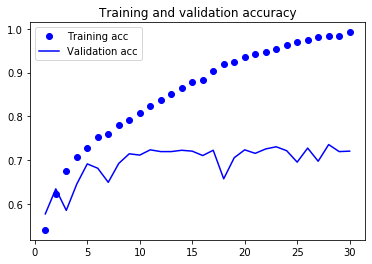

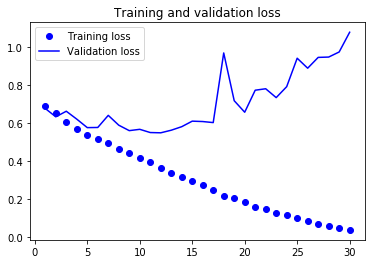

In [19]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()